In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [56]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
1. Frequency Tables:
  - Generate a frequency table for the product category.

In [5]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

  - Which are the top 5 most listed product categories?
Sports & Outdoors, Beauty, Handmade Clothing, Shoes & Accessories, Bath & Body, Birthday Gifts

2. Visualizations:

  - Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

In [19]:
# Select top 5 categories
top_10_category = frequency_table.head(10)
top_10_df = top_10_category.reset_index()

/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_2604/895242295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_df, x='category', y='count', palette='viridis')


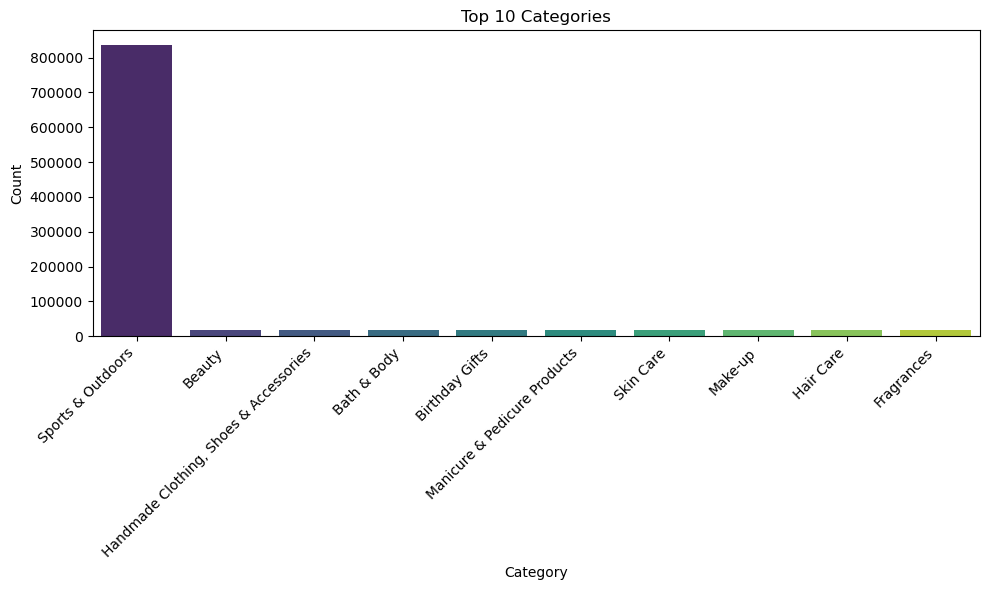

In [20]:
plt.figure(figsize=(10, 6)) 
sns.barplot(data=top_10_df, x='category', y='count', palette='viridis')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Categories')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [24]:
top_5_category = frequency_table.head(5)
top_5_df = top_5_category.reset_index()

([<matplotlib.patches.Wedge at 0x16042f810>,
 [Text(-0.28666771368868316, -1.0619894641325325, 'Sports & Outdoors'),
  Text(0.4891716928879617, 0.985246697470804, 'Beauty'),
  Text(0.3545789173188807, 1.0412846831644893, 'Handmade Clothing, Shoes & Accessories'),
  Text(0.21457431617737968, 1.0788687885174035, 'Bath & Body'),
  Text(0.0717914226731242, 1.0976547688734235, 'Birthday Gifts')],
 [Text(-0.1563642074665544, -0.5792669804359267, '91.6%'),
  Text(0.2668209233934336, 0.5374072895295293, '2.1%'),
  Text(0.1934066821739349, 0.5679734635442668, '2.1%'),
  Text(0.11704053609675254, 0.5884738846458565, '2.1%'),
  Text(0.0391589578217041, 0.5987207830218674, '2.1%')])

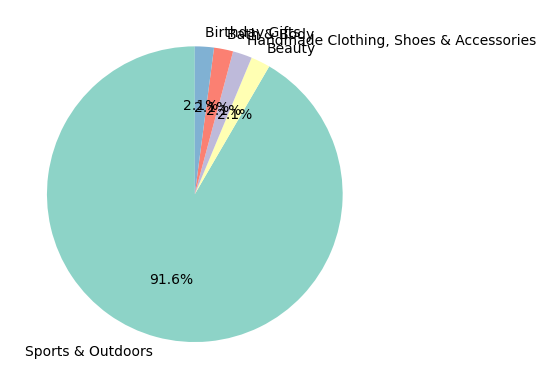

In [25]:
plt.pie(top_5_df['count'], labels=top_5_df['category'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?
1. Measures of Centrality:
  - Calculate the mean, median, and mode for the price of products.

In [26]:
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [27]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

What's the average price point of products listed? How does this compare with the most common price point (mode)?
The average price point of products listed is 89.24. The average price is much higher than the most common price point, which is 9.99

2. Measures of Dispersion:
  - Determine the variance, standard deviation, range, and interquartile range for product price.

In [28]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532254907,
 345.60886175349884,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

How varied are the product prices? Are there any indicators of a significant spread in prices?
The product prices are very varied. The variance gives us the spread in price, and it is a very big number, indicating the price of the products listed are very spread.

3. Visualizations:
  - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.

<Axes: xlabel='price', ylabel='Count'>

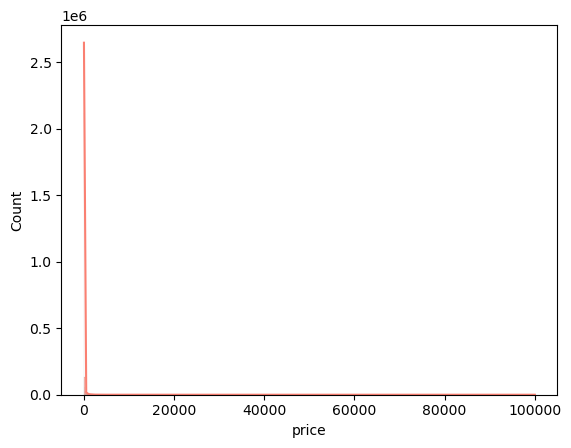

In [36]:
sns.histplot(df['price'], kde=True, bins=1000, color='salmon')

In [50]:
frequency_table_price = df['price'].value_counts()
top_50_price = frequency_table_price.head(50)
top_50_df = top_50_price.reset_index()

<Axes: xlabel='price', ylabel='Count'>

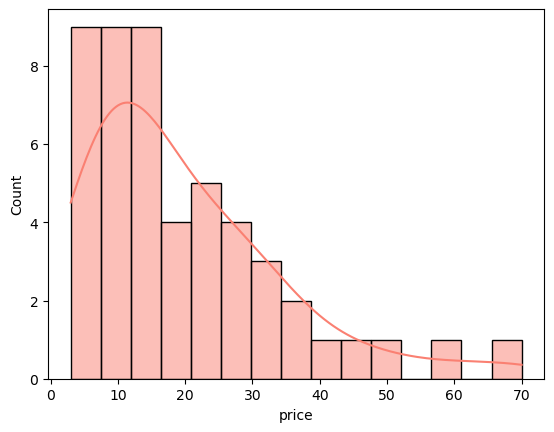

In [51]:
sns.histplot(top_50_df['price'], kde=True, bins=15, color='salmon')

It is very hard do read the first histogram because there are a lot of different prices, almost each product has its own price (different from the price of the other products). But in the second histogram we can see that there is a specific price range where most products fall, it's between 6 and 26

  - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: xlabel='price'>

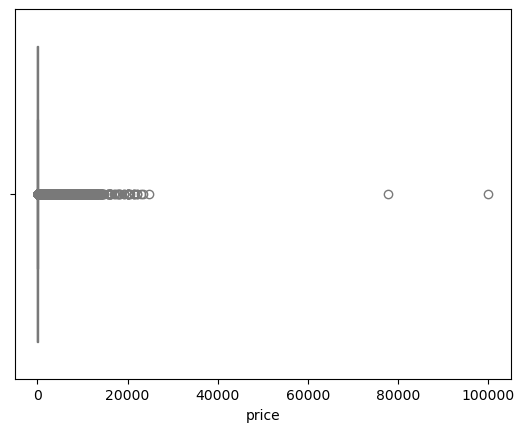

In [54]:
sns.boxplot(data=df, x='price', color="lightblue")

Yes, there are products priced ate 100000 and 80000, which is much higher than the rest.

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?
1. Measures of Centrality:
  - Calculate the mean, median, and mode for the rating of products.

In [57]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

  - How do customers generally rate products? Is there a common trend?
Customers generally do not rate products, that's why the mode for rating is 0

2. Measures of Dispersion:
  - Determine the variance, standard deviation, and interquartile range for product rating.

In [58]:
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

variance_rating, std_dev_rating, min_rating, max_rating, range_rating, quantiles_rating

(4.817434029796862,
 2.1948653785134207,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

Are the ratings consistent, or is there a wide variation in customer feedback?
Since the rating scale is from 1 to 5, having a variance of 4.82 means there are all ratings all  over the scale.

3. Shape of the Distribution:
  - Calculate the skewness and kurtosis for the rating column.

In [59]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

  - Are the ratings normally distributed, or do they lean towards higher or lower values?
skewness_rating is approximately 0.081, which is close to zero. This suggests that the distribution of the ratings is nearly symmetrical. The negative kurtosis_rating indicates that the distribution has lighter tails and a flatter peak compared to a normal distribution.

4. Visualizations:
  - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

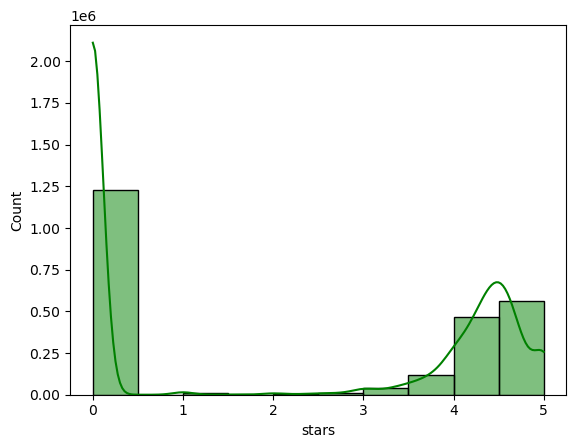

In [63]:
sns.histplot(df['stars'], kde=True, bins=10, color='green')

The majority of rating are equal to zero, which seems to mean that the customer didn't rate the product. Especially because the following most common rating is 5 stars, which seams to indicate that clients are usually happy with the products.